In [15]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from matplotlib import pyplot as plt
from tabulate import tabulate

<h2>Téléchargement du ﬁchier CIF du matériau attribué (càd le KNa2Sb)</h2>

In [16]:
#entrée de mon API de la version Legacy de materialsproject
with MPRester("toW9wacOwhTywK26") as m:

    structure = m.get_structure_by_material_id("mp-15724") #materials id du KNa2Sb
    
struct = SpacegroupAnalyzer(structure)
struct_conv = struct.get_conventional_standard_structure()

<h2>Calcul des 3 premiers pics et affichage du diffractogramme correspondant, pour un rayonnement X incident Cu Ka de longueur d’onde λ = 1.54060 Å</h2>

1 er pic de diffraction :
Indices hkl associés : [{'hkl': (1, 0, 0), 'multiplicity': 6}, {'hkl': (1, 1, 1), 'multiplicity': 2}]
Intensité = 32.02458476041004
θ = 9.8516489024358 °
2θ = 19.7032978048716 °


2 ème pic de diffraction
Indices hkl associés : [{'hkl': (1, 1, 0), 'multiplicity': 6}]
Intensité = 35.62853707719238
θ = 11.394698047123194 °
2θ = 22.78939609424639 °


3 ème pic de diffraction
Indices hkl associés : [{'hkl': (1, 0, -1), 'multiplicity': 6}, {'hkl': (2, 1, 1), 'multiplicity': 6}]
Intensité = 100.0
θ = 16.224481987728105 °
2θ = 32.44896397545621 °




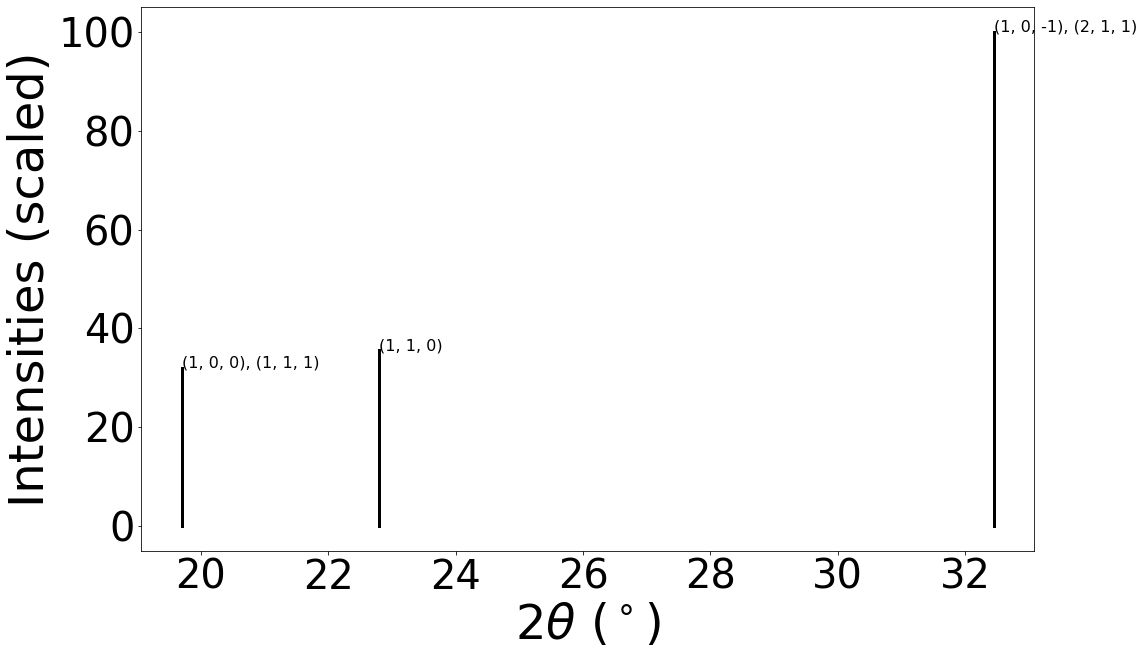

In [17]:
xrd = XRDCalculator('CuKa')
motif = xrd.get_pattern(structure,scaled=True)

pics=[1,2,3]
j=0
for i in range (len(pics)):
    j+=1
    if (j==1):
        print(pics[i],"er pic de diffraction :")
    else :
        print(pics[i],"ème pic de diffraction")
    print("Indices hkl associés :", motif.hkls[i])
    print("Intensité =", motif.y[i])
    print("\u03B8 =", motif.x[i]/2,"°")    
    print("2\u03B8 =", motif.x[i],"°")
    print("\n")

xrd.show_plot(structure,two_theta_range=(0,35))